## Case Study: 
  ### This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail,The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


## Attribute Information:

#### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
#### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
#### Description: Product (item) name. Nominal.
#### Quantity: The quantities of each product (item) per transaction. Numeric.
#### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
#### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
#### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
#### Country: Country name. Nominal, the name of the country where each customer resides.



### Data Set Characteristics:  Multivariate, Sequential, Time-Series

### Associated Tasks: Classification, Clustering


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix
from sklearn import metrics

### From the aboue case study we are going to Analysis the Given data Set

In [2]:
df=pd.read_excel("C:/Users/anura/OneDrive/Desktop/DT Consulting/Meergrow/Online Retail.xlsx")

In [3]:
df.sort_values(["Quantity"],ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
...,...,...,...,...,...,...,...,...
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
dups=df.duplicated()

In [7]:
print("numbers of duplicate=%d"%(dups.sum()))

numbers of duplicate=5268


#### The Given data Info we can see that Data Frame is Class-pandas.core.frame.DataFrame with Range Index= 541909 entries from 0 to 541908 and in Data columns there are Total 08 Column. Data. As we can see datetime64 [ns] (1),Dtype:int64(1), Object (4) ,float64(2) . 

#### we can see in Non-Null Count >>> null value Present in Description and CustomerID.

####  In Describe we we will get Mean std. Dev., min.,25%,50%,75%, Max. value of each Variable in that count is 541909 in all variables as we can in shape also.
#### Shape of Data = (541909,8)
#### We found Numbers of duplicate =5268


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
for column in ["Description","CustomerID"]:
    df[column].fillna(df[column].mode()[0],inplace = True) 

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### In the Data set contain Null value  
### Description : 1454
### CustomerID :135080
#### So treat Null value  with Imputation of Mode,we are not removing Null value it affect the data 

In [12]:
df1 = df[["Description","Quantity"]].groupby(['Description'])['Quantity'] \
                             .count() \
                             .reset_index(name='count_Quantity') \
                             .sort_values(['count_Quantity'], ascending=False) \
           

In [13]:
df1

,Description,count_Quantity
3918,WHITE HANGING HEART T-LIGHT HOLDER,3823
2915,REGENCY CAKESTAND 3 TIER,2200
1866,JUMBO BAG RED RETROSPOT,2159
2471,PARTY BUNTING,1727
2054,LUNCH BAG RED RETROSPOT,1638
...,...,...
2319,ORANGE FELT VASE + FLOWERS,1
2318,OPULENT VELVET SET/3 CANDLES,1
2315,OOPS ! adjustment,1
2314,OOH LA LA DOGS COLLAR,1


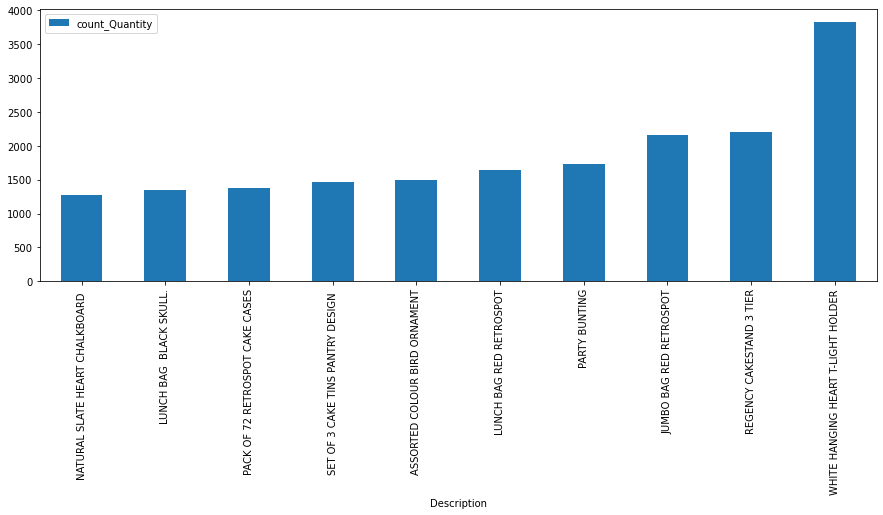

In [14]:
df1.groupby(by=['Description'])['count_Quantity'].sum().reset_index().sort_values(['count_Quantity']).tail(10).plot(x='Description',
                                                                                                           y='count_Quantity',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

### In description of Product we can see that maximum order ordered by wholesale Customers:

#### "WHITE HANGING HEART T-LIGHT HOLDER" : 3823
#### "REGENCY CAKESTAND 3 TIER"                      : 2200
#### "JUMBO BAG RED RETROSPOT"                     : 2159
#### "PARTY BUNTING"                                              : 1727
#### "LUNCH BAG RED RETROSPOT"                      : 1638

### And lowest order ordered was:

#### "ORANGE FELT VASE + FLOWERS"                 :  1
#### "OPULENT VELVET SET/3 CANDLES"              :  1
#### "OOPS ! adjustment"	                                       : 1
#### "OOH LA LA DOGS COLLAR"                            :  1
#### "wrongly sold sets"                                             :	1


### And from the above its completly visible that maximum  demand of Product as we compare it with country level we can see the first two Maximum Order odered by:
#### United Kingdom : 495478 
#### France:9495

### as we can see last two lowest order ordered by
#### Bahrain: 19
#### Saudi Arabia:10
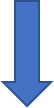
 


In [15]:
df['Country'].sort_values().value_counts()


United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [16]:
df.groupby(['Country']).sum().sort_values(['Quantity'],ascending=False)

,Quantity,UnitPrice,CustomerID
Country,,,
United Kingdom,4263829,2.245715e+06,8.009990e+09
Netherlands,200128,6.492550e+03,3.419054e+07
EIRE,142637,4.844719e+04,1.230767e+08
Germany,117448,3.766600e+04,1.200751e+08
France,110480,4.303199e+04,1.088264e+08
Australia,83653,4.054750e+03,1.569300e+07
Sweden,35637,1.806830e+03,6.790083e+06
Switzerland,30325,6.813690e+03,2.600604e+07
Spain,26824,1.263345e+04,3.268929e+07


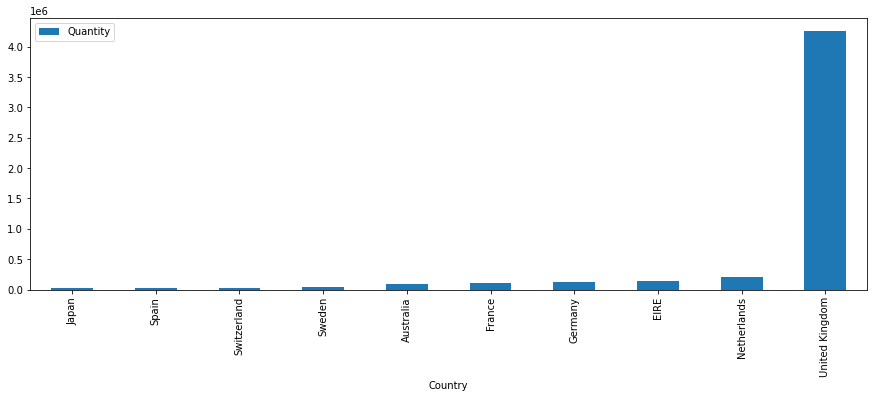

In [17]:
df.groupby(by=['Country'])['Quantity'].sum().reset_index().sort_values(['Quantity']).tail(10).plot(x='Country',
                                                                                                           y='Quantity',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

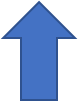


### in bar plot we can see  "Country" with respect to  "Quantity" ordered:

#### United kingdom =4263829 as maximum order in terms of Total Quantity with Total Quantity UnitPrice=2.245715e+06

#### Netherland =200128 Secound maximum  order with Total Quantity and its UnitPrice=6.492550e+03 which is less than  EIRE = 	4.844719e+04 ,so we can say that  EIRE ordered primium Product as if we compaired  with Total Quantity=142637.


#### we can see Bahrain and Saudi Arabia	 as lowest Order Quantity 

#### Netherland Come at 12th possition  if we go total Sum Price  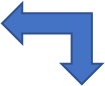



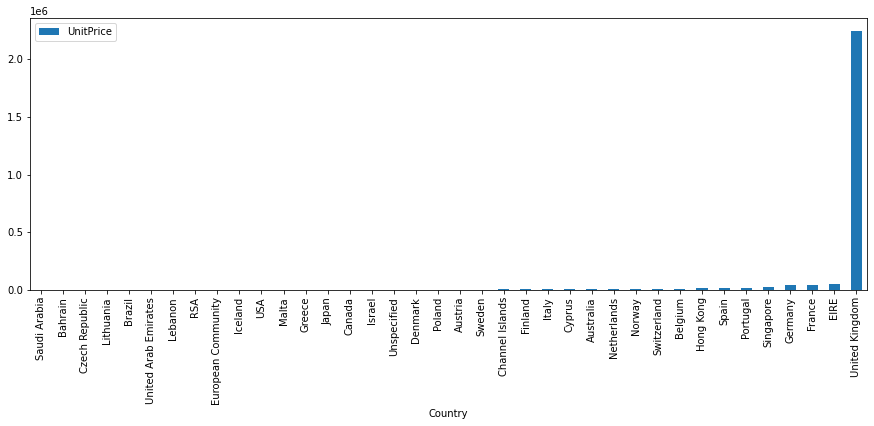

In [18]:
df.groupby(by=['Country'])['UnitPrice'].sum().reset_index().sort_values(['UnitPrice']).plot(x='Country',
                                                                                                           y='UnitPrice',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

In [19]:
df.groupby(['Country']).mean().sort_values(['UnitPrice'],ascending=False)

,Quantity,UnitPrice,CustomerID
Country,,,
Singapore,22.855895,109.645808,12744.000000
Hong Kong,16.559028,42.505208,17841.000000
Portugal,10.651745,8.582976,12877.287031
Cyprus,10.155949,6.302363,12404.951768
Canada,18.298013,6.030331,17321.079470
Norway,17.722836,6.012026,12437.984346
EIRE,17.403245,5.911077,15016.678380
Finland,15.346763,5.448705,12517.012950
Lebanon,8.577778,5.387556,12764.000000


In [20]:
df3=df.groupby(['InvoiceNo']).sum().sort_values(['Quantity'],ascending=False)
df3.head()

,Quantity,UnitPrice,CustomerID
InvoiceNo,,,
581483,80995,2.08,16446.0
541431,74215,1.04,12346.0
556917,15049,283.57,1713270.0
563076,14730,269.39,1742874.0
574941,14149,498.89,1801941.0


In [21]:

df.groupby(['Country']).count().sort_values(['InvoiceNo'],ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
United Kingdom,495478,495478,495478,495478,495478,495478,495478
Germany,9495,9495,9495,9495,9495,9495,9495
France,8557,8557,8557,8557,8557,8557,8557
EIRE,8196,8196,8196,8196,8196,8196,8196
Spain,2533,2533,2533,2533,2533,2533,2533
Netherlands,2371,2371,2371,2371,2371,2371,2371
Belgium,2069,2069,2069,2069,2069,2069,2069
Switzerland,2002,2002,2002,2002,2002,2002,2002
Portugal,1519,1519,1519,1519,1519,1519,1519


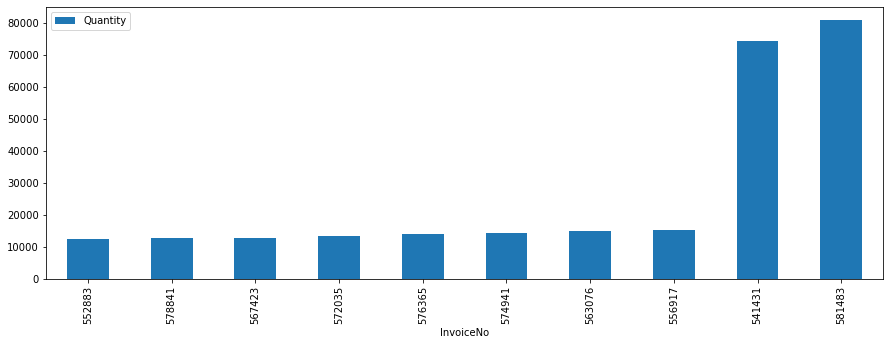

In [22]:
df.groupby(by=['InvoiceNo'])['Quantity'].sum().reset_index().sort_values(['Quantity']).tail(10).plot(x='InvoiceNo',
                                                                                                           y='Quantity',
                                                                                                           kind='bar',
                                                            
                                                                                                     figsize=(15,5))
plt.show()

In [23]:
df.groupby(["InvoiceNo"]).sum().head(10).sort_values(['UnitPrice'],ascending=False)

,Quantity,UnitPrice,CustomerID
InvoiceNo,,,
536367,83,58.24,156564.0
536370,449,55.29,251660.0
536373,88,53.11,285600.0
536365,40,27.37,124950.0
536368,15,19.10,52188.0
536374,32,10.95,15100.0
536369,3,5.95,13047.0
536366,12,3.70,35700.0
536372,12,3.70,35700.0


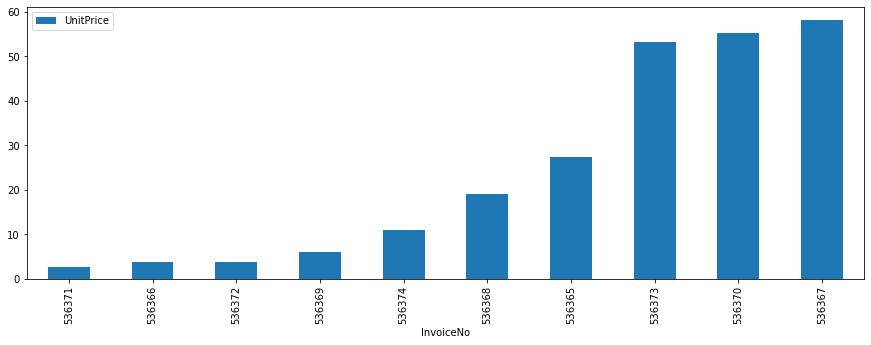

In [24]:
df.groupby(by=["InvoiceNo"])["UnitPrice"].sum().head(10).reset_index().sort_values(["UnitPrice"]).head(10).plot(x="InvoiceNo"
                                                                                                     ,y="UnitPrice",
                                                                                                     kind="bar",
                                                                                                     figsize=(15,5))

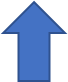
###  we can see the  Invoice no. 581483= 80995 order in term of Total_Quantity and UnitPrice= 2.08.

#### If we Multiple Order to UnitPrice it Give: ~168469

### second Invoice no. 541431=74215 order in term of Total_Quantity and UnitPrice=1.04	

#### If we Multiple Order to UnitPrice it Give: ~77183

## If we compaire InvoiceNo with UnitPrice 

###  we can see that InvoiceNo. 536367=83 order quantity with unit price=58.24
#### If we Multiple Order to UnitPrice it Give: ~4833

###  we can see that InvoiceNo. 536370=449	 order quantity with unit price=55.29
#### If we Multiple Order to UnitPrice it Give: ~24825


# From above we can say that Quantity give maximum Total_UnitPrice in term of Profit :say 

In [25]:
df['InvoiceNo'].str.contains('c').sum()

0

In [26]:
df['InvoiceNo'].str.contains('c').count()

9291

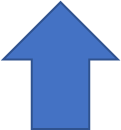
##  Given Data set  contain cancel Order by Given notation C in "InvoiceNo" 

####  Data set contain 9291 cancel order in terms of Counts


## If we go with respect to Country then

### United Kingdom has maximum cancel order 

### Netherland and Japan has second Maximum cancel order

#### positive Value give order Quantity and Negative Value give cancel order : say

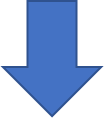

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 <a list of 38 Text major ticklabel objects>)

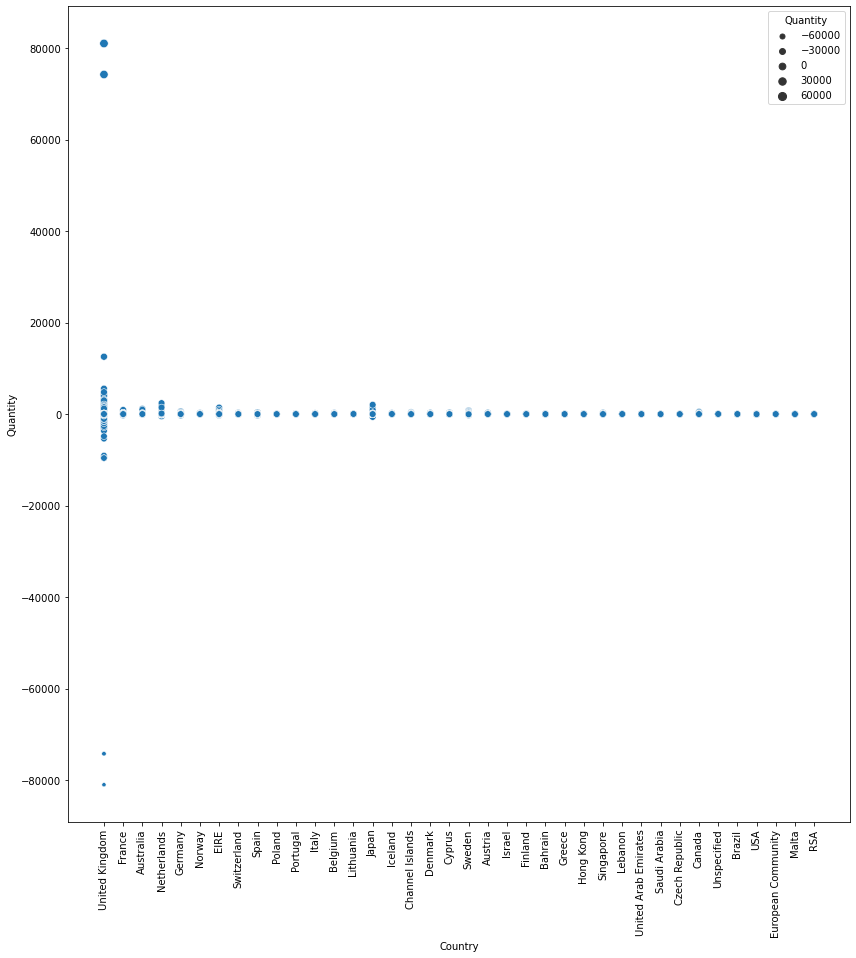

In [27]:
plt.figure(figsize=(14,15))
sns.scatterplot(x=df['Country'],y='Quantity', data=df, size = "Quantity")
plt.xticks(rotation=90)


## Outlier_Checking

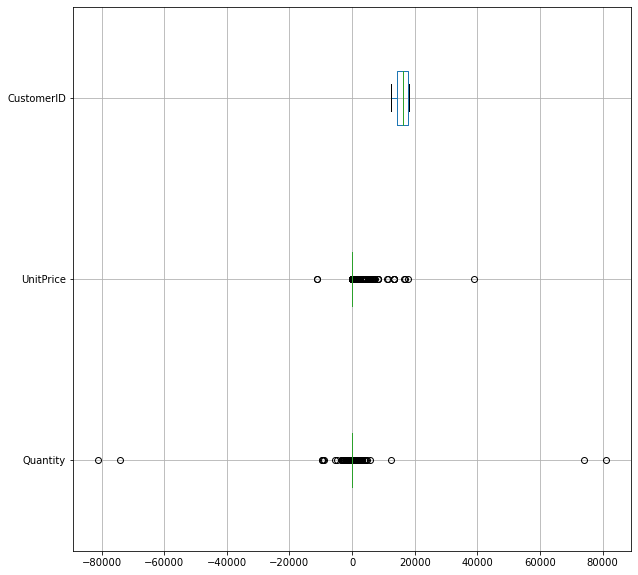

In [28]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [29]:
# Removing_Outliers:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
lr,ur=remove_outlier(df["Quantity"])
df["Quantity"]=np.where(df["Quantity"]>ur,ur,df["Quantity"])
df["Quantity"]=np.where(df["Quantity"]<lr,lr,df["Quantity"])

lr,ur=remove_outlier(df["UnitPrice"])
df["UnitPrice"]=np.where(df["UnitPrice"]>ur,ur,df["UnitPrice"])
df["UnitPrice"]=np.where(df["UnitPrice"]<lr,lr,df["UnitPrice"])

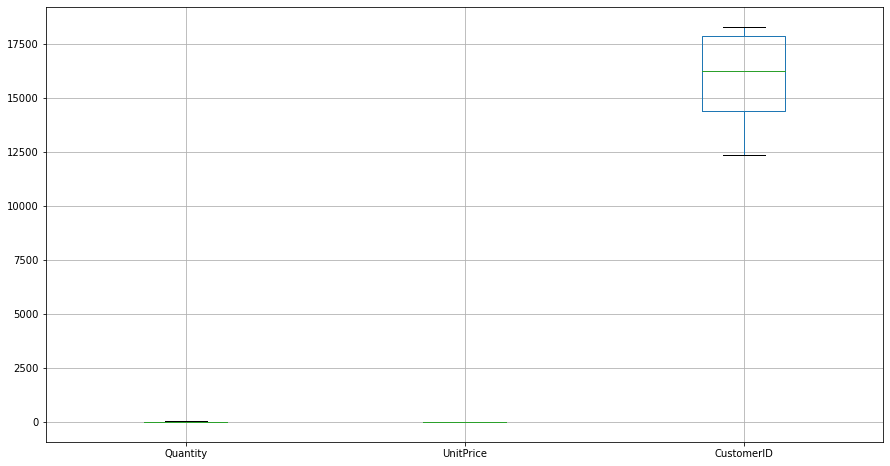

In [31]:
plt.figure(figsize=(15,8))
df.boxplot();

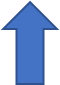
###  BaXplot contain Outlier in UnitPrice and Quantity to treat_outlier  we use Inter_Quartile_Range(IQR) Method 

#### we are treating Outliers with Upper limit and Lower Limit 

### by returning Lower_Range and upper_Range  

### So there is no outlier Present present Above BoxPlot 

# Univariate Analysis

C:\Users\anura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

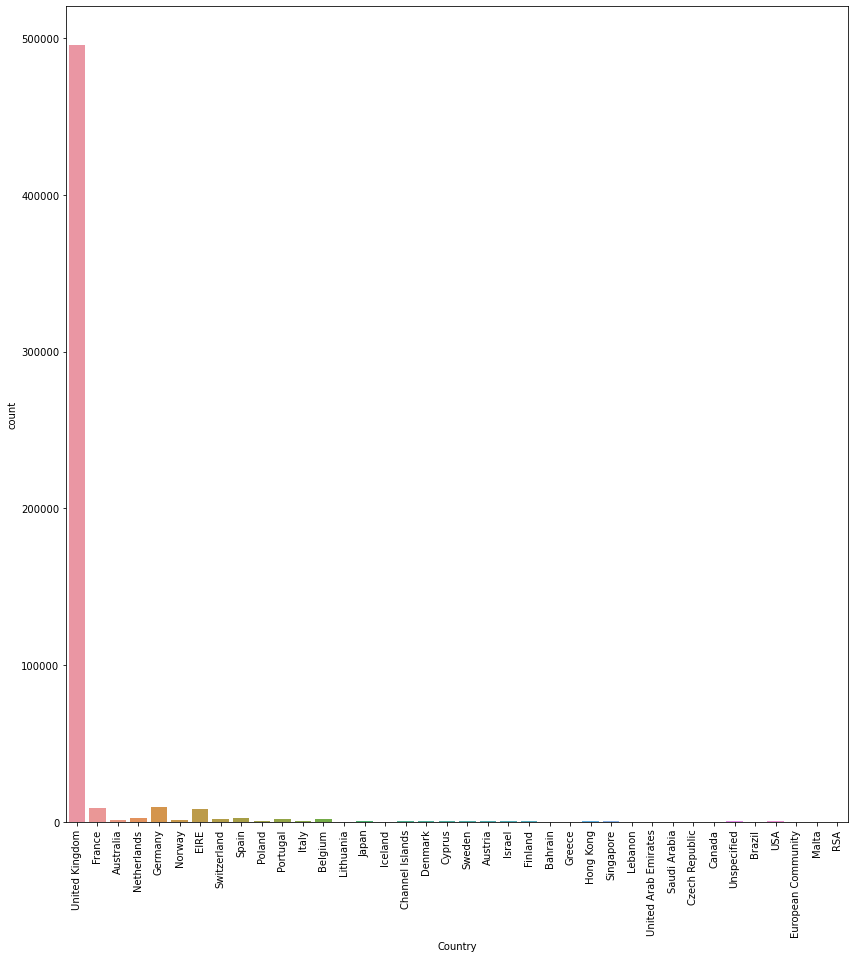

In [32]:
plt.figure(figsize=(14,15))
sns.countplot(df['Country'])
plt.xticks(rotation=90)

C:\Users\anura\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


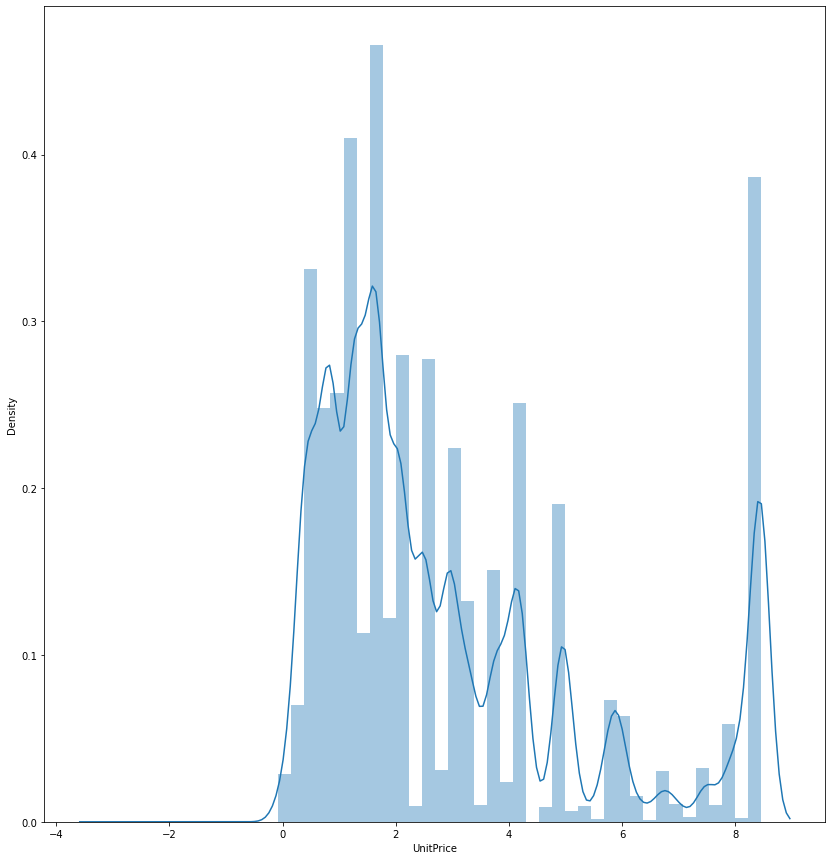

In [33]:
plt.figure(figsize=(14,15))
sns.distplot(df['UnitPrice']);

# Bivariate and Multivariate Analysis

C:\Users\anura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 <a list of 38 Text major ticklabel objects>)

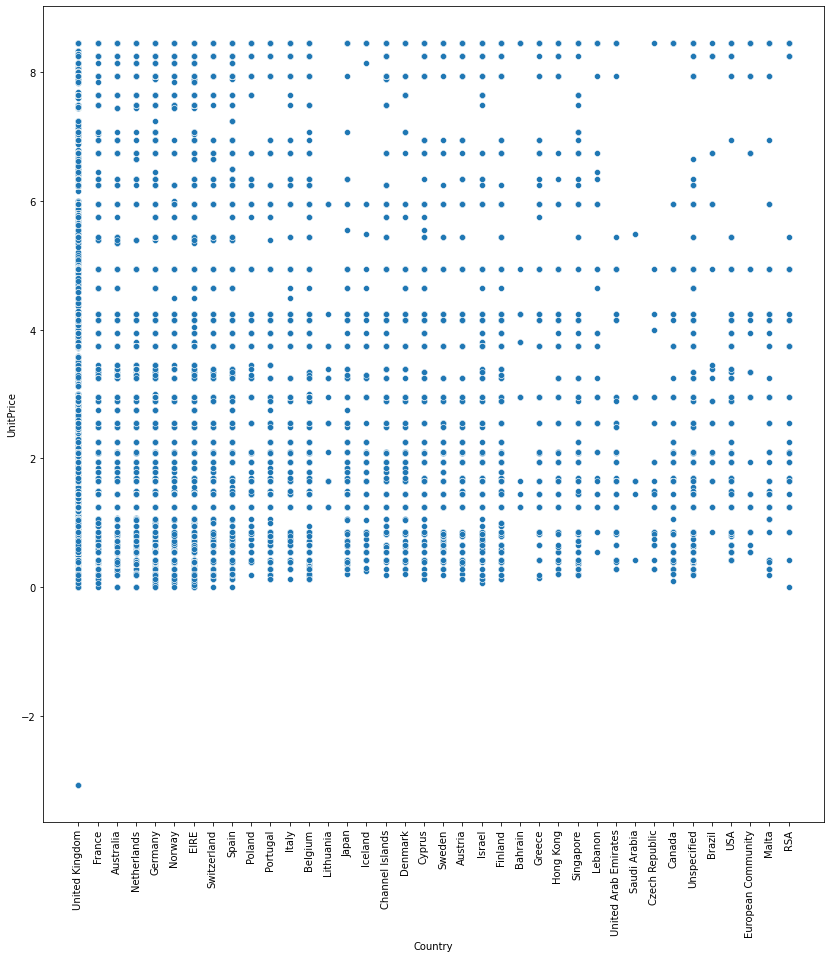

In [34]:
plt.figure(figsize=(14,15))
sns.scatterplot(df["Country"],df["UnitPrice"])
plt.xticks(rotation=90)

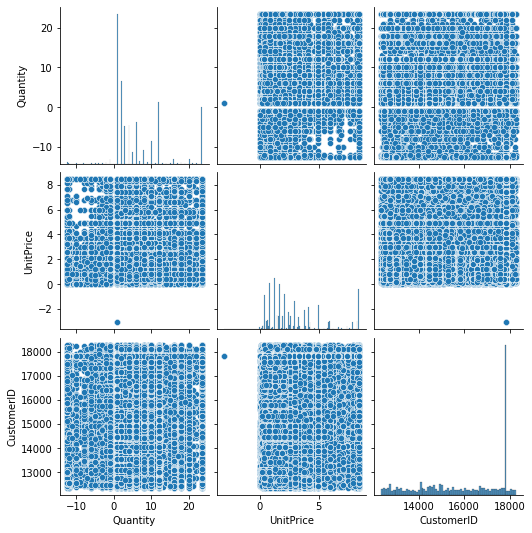

In [35]:
sns.pairplot(df)

In [36]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.00000,-0.358790,-0.266700
UnitPrice,-0.35879,1.000000,0.100043
CustomerID,-0.26670,0.100043,1.000000


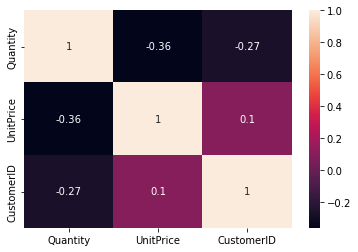

In [37]:
sns.heatmap(df.corr(),annot=True);

# for  Time-Series

In [38]:
df1=pd.read_excel('C:/Users/anura/OneDrive/Desktop/DT Consulting/Meergrow/Online Retail.xlsx',parse_dates=True,index_col='InvoiceDate')


In [39]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [40]:
df1=df1[['UnitPrice','Quantity']]
df1.head()

,UnitPrice,Quantity
InvoiceDate,,
2010-12-01 08:26:00,2.55,6
2010-12-01 08:26:00,3.39,6
2010-12-01 08:26:00,2.75,8
2010-12-01 08:26:00,3.39,6
2010-12-01 08:26:00,3.39,6


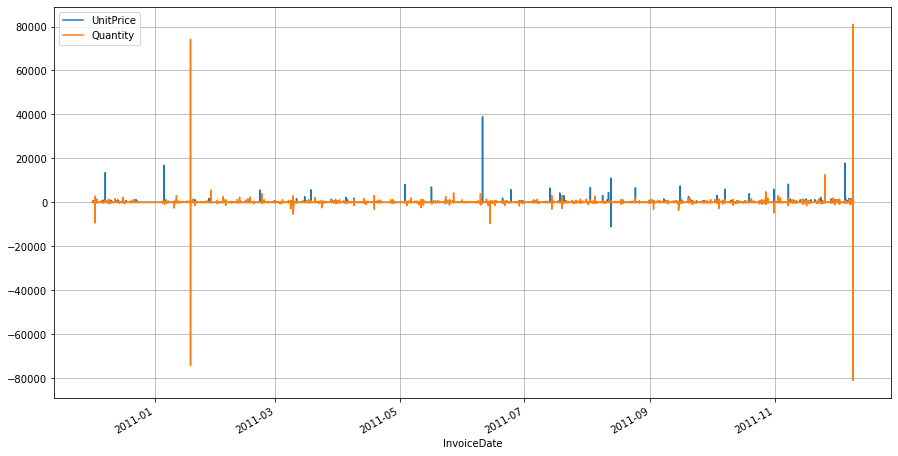

In [41]:
#Plot the Time Series Data.
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df1.plot();
plt.grid()

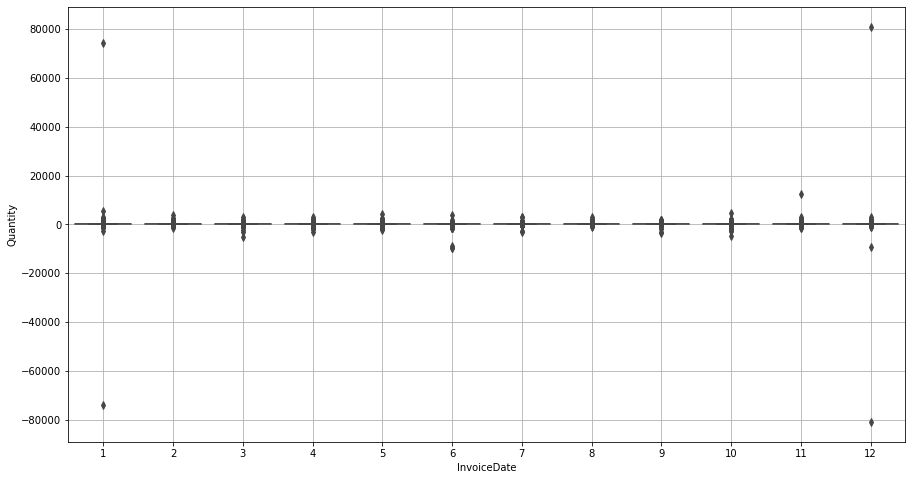

In [156]:
sns.boxplot(x=df1.index.month,y=df1['Quantity'])
plt.grid()

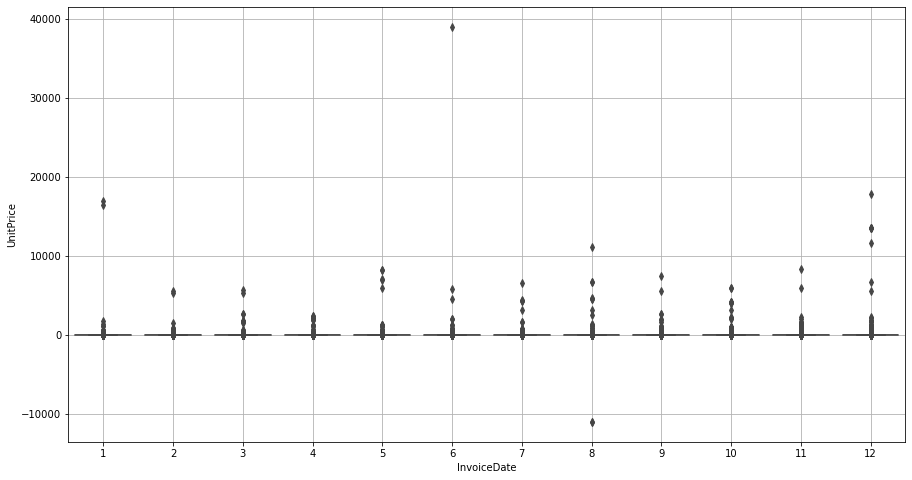

In [157]:
sns.boxplot(x=df1.index.month,y=df1['UnitPrice'])
plt.grid()

In [44]:
monthly_UnitPrice_across_years = pd.pivot_table(df1, values = 'UnitPrice', columns = df1.index.month_name(), index = df1.index.year)
monthly_UnitPrice_across_years

InvoiceDate,April,August,December,February,January,July,June,March,May,November,October,September
InvoiceDate,,,,,,,,,,,,
2010,NaN,NaN,6.132644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,4.317588,4.262149,5.246451,4.599876,4.915151,4.350088,5.44333,4.666554,5.149486,3.861952,4.336935,3.966774


In [45]:
monthly_Quantity_across_years = pd.pivot_table(df1, values = 'Quantity', columns = df1.index.month_name(), index = df1.index.year)
monthly_Quantity_across_years

InvoiceDate,April,August,December,February,January,July,June,March,May,November,October,September
InvoiceDate,,,,,,,,,,,,
2010,NaN,NaN,8.056025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,9.663658,11.512272,8.867111,10.033169,8.790679,9.897161,9.264604,9.575269,10.272509,8.73896,9.39271,10.94686


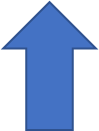

## From the above time series Analysis we can say that if Demand of Quantity increase then Price of Quantity also Increase.

### we can see the demand of product increase in the month of May,June,August,December.

### we can see Demand of Product decrease in the Month of November,December,January


# Model Building
### from the pair plot we can say that Data is NoN_Linear Clasification_Problem Type so We will go with First Ensemble_Technique

In [196]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [197]:
X=df.drop(['Country','InvoiceNo','StockCode','InvoiceDate','CustomerID'],axis=1)
y=df['Country']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [198]:
x_train.head()

,Description,Quantity,UnitPrice
387168,368,23.5,2.49
310839,2106,12.0,2.95
519047,2493,12.0,0.39
440442,3796,2.0,8.25
213553,308,20.0,0.42


In [199]:
x_test.head()

,Description,Quantity,UnitPrice
94801,1833,-2.0,3.75
210111,1067,1.0,8.45
455946,112,23.5,0.55
403542,1604,16.0,1.25
471951,2709,12.0,1.65


In [200]:
y_train.head()

387168    36
310839    36
519047    36
440442    36
213553    36
Name: Country, dtype: int8

In [201]:
y_test.head()

94801     36
210111    36
455946    36
403542    36
471951    14
Name: Country, dtype: int8

# Ada Boost

In [202]:
from sklearn.ensemble import AdaBoostRegressor

ADB_model = AdaBoostRegressor(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=1)

In [203]:
ADB_model.score(x_train,y_train)

-0.3462128169689238

In [204]:
ADB_model.score(x_test,y_test)

-0.3418957053424374

In [205]:
ADB_y_train_predict = ADB_model.predict(x_train)
ADB_y_test_predict = ADB_model.predict(x_test)

In [206]:
np.sqrt(metrics.mean_squared_error(y_train,ADB_y_train_predict))

7.220504515787038

In [207]:
np.sqrt(metrics.mean_squared_error(y_test,ADB_y_test_predict))

7.207756088777701

In [261]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)


-0.3462128169689238


In [263]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)

-0.3418957053424374


# Gradient Boost

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(random_state=1)
gbcl = gbcl.fit(x_train, y_train)

In [209]:
gbcl.score(x_train,y_train)

0.09656146553975764

In [210]:
gbcl.score(x_test,y_test)

0.09417512375148751

In [211]:
GB_y_train_predict = gbcl.predict(x_train)
GB_y_test_predict = gbcl.predict(x_test)

In [212]:
np.sqrt(metrics.mean_squared_error(y_train,GB_y_train_predict))

5.915071364866841

In [213]:
np.sqrt(metrics.mean_squared_error(y_test,GB_y_test_predict))

5.921923895542421

In [264]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(x_train)
model_score = gbcl.score(x_train, y_train)
print(model_score)

0.09656146553975764


In [266]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(x_test)
model_score = gbcl.score(x_test, y_test)
print(model_score)

0.09417512375148751


# Random Forest

In [270]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [271]:
rfcl = RandomForestRegressor()
rfcl = rfcl.fit(x_train,y_train)

In [272]:
rfcl

RandomForestRegressor()

In [273]:
rfcl.score(x_train,y_train)

0.25422590530264955

In [274]:
rfcl.score(x_test,y_test)

0.12408854730306162

In [275]:
RF_y_train_predict = rfcl.predict(x_train)
RF_y_test_predict = rfcl.predict(x_test)

In [276]:
np.sqrt(metrics.mean_squared_error(y_train,RF_y_train_predict))

5.374206256590714

In [277]:
np.sqrt(metrics.mean_squared_error(y_test,RF_y_test_predict))

5.8233219672209025

In [278]:
rfcl.feature_importances_

array([0.53629734, 0.2678941 , 0.19580856])

In [279]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Anurag"], index = x_train.columns))

               Anurag
Description  0.536297
Quantity     0.267894
UnitPrice    0.195809


In [283]:
## Performance Matrix on train data set
y_train_predict = rfcl.predict(x_train)
model_score =rfcl.score(x_train, y_train)
print(model_score)


0.25422590530264955


In [284]:
## Performance Matrix on test data set
y_test_predict = rfcl.predict(x_test)
model_score = rfcl.score(x_test, y_test)
print(model_score)

0.12408854730306162


# Decision Tree

In [290]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [291]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [292]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9206429128793471
[[   226      0      0 ...      0    612      0]
 [     0      8      0 ...      0    254      0]
 [     0      0      2 ...      0     13      0]
 ...
 [     0      0      0 ...      6     46      0]
 [    95      7      0 ...      4 345593      0]
 [     0      0      0 ...      0    285     21]]


C:\Users\anura\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anura\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anura\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.54      0.25      0.34       899
           1       0.42      0.03      0.05       273
           2       1.00      0.13      0.24        15
           3       0.52      0.04      0.07      1428
           4       0.00      0.00      0.00        24
           5       0.75      0.03      0.06       104
           6       0.62      0.04      0.08       527
           7       0.50      0.08      0.13       448
           8       0.80      0.50      0.62        24
           9       0.52      0.13      0.21       267
          10       0.69      0.11      0.19      5669
          11       0.50      0.04      0.08        47
          12       0.62      0.10      0.17       493
          13       0.48      0.08      0.13      6048
          14       0.50      0.14      0.22      6675
          15       0.75      0.03      0.06        97
          16       0.55      0.14      0.22       207
          17       0.75    

In [293]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9084226778124289
[[    22      0      0 ...      0    288      0]
 [     0      0      0 ...      0    116      0]
 [     0      0      0 ...      0      4      0]
 ...
 [     0      0      0 ...      0     14      0]
 [   112      6      0 ...      6 147093      4]
 [     0      0      0 ...      0    132      0]]


C:\Users\anura\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anura\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.12      0.06      0.08       360
           1       0.00      0.00      0.00       128
           2       0.00      0.00      0.00         4
           3       0.04      0.00      0.01       641
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        47
           6       0.09      0.01      0.02       231
           7       0.00      0.00      0.00       174
           8       0.00      0.00      0.00         6
           9       0.04      0.01      0.01       122
          10       0.20      0.03      0.05      2527
          11       0.25      0.07      0.11        14
          12       0.05      0.01      0.02       202
          13       0.20      0.04      0.06      2509
          14       0.25      0.07      0.11      2820
          15       0.00      0.00      0.00        49
          16       0.12      0.04      0.06        81
          17       0.00    

C:\Users\anura\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [299]:
DT_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
DT_model.fit(x_train, y_train)
print(DT_model.score(x_train, y_train))
print(DT_model.score(x_test, y_test))

0.9144610582702406
0.9139894078352494


In [302]:

print (pd.DataFrame(DT_model.feature_importances_, columns = ["Anurag_IMP"], index = x_train.columns))

             Anurag_IMP
Description    0.106547
Quantity       0.806304
UnitPrice      0.087149


# Bagging

In [285]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [286]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(x_train)
model_score =Bagging_model.score(x_train, y_train)
print(model_score)

0.9206376405086784


In [287]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(x_test)
model_score = Bagging_model.score(x_test, y_test)
print(model_score)

0.9123655219501393


### From Multivarient Analysis Data set look like NoN-Linear Clasifier as say:

# fro such Data set Ensemble technique is the best way to find the best model.

### Results Of Model are :

## 1) ADA  BOOST : train and test Accuracy Score = 0.34 and 0.34

## 2) Gradient Boost: train and test Accuracy Score = 0.096 and 0.094

## 3) Random Forest : train and test Accuracy Score = 0.25 and 0.12

###                      Anurag(Important Features)

#### Description                   0.536297
#### Quantity                        0.267894
#### UnitPrice                       0.195809

#### Important_Features as Anurag gives The Maximum Importance to the Description  which means Description play  Important role after Description it Give Important to Quantity then base on Quantity and Description UnitPrice can Predicted.
## But the Accuracy of this model is low as compair to Decision tree and Bagging Technique


## 4) Decision Tree: train and test Accuracy Score = 0.92 and 0.90

###                               Anurag_IMP

####  Description                   0.106547
#### Quantity                         0.806304
#### UnitPrice                        0.087149

#### Important_Features as Anurag_IMP gives The Maximum Importance to the Quantity  which means Quantity play  Important role after Quantity it Give  second Important to Description and  base on Quantity and Description UnitPrice can Predicted.

## So From Accuracy, Online_Retail has suggetion that , give Importance to Quantity If Quantity increase Automatically Value of Product description increase and Base on this two Category UnitPrice can Predicted and base on order Demand_Quantity UnitPrice also can be Predicted with the Help Of Sessional_Demand

## 5) Bagging : train and test Accuracy Score = 0.92 and 0.91

## From All of Model  "Decision Tree" and "Bagging Technique" good Model  Becuase  If we Overlook The Accuracy Score,CunfussionMatrix And Clasification report recall value is Less than 0.05 so This model is Good As compaire to other.




# Clustering

In [224]:
from sklearn.preprocessing import StandardScaler

In [225]:
X = StandardScaler()

In [226]:
df2=df.drop(['InvoiceNo','StockCode','InvoiceDate','CustomerID'],axis=1)
df2.head()

,Description,Quantity,UnitPrice,Country
0,3918,6.0,2.55,36
1,3926,6.0,3.39,36
2,913,8.0,2.75,36
3,1910,6.0,3.39,36
4,2911,6.0,3.39,36


In [227]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  541909 non-null  int16  
 1   Quantity     541909 non-null  float64
 2   UnitPrice    541909 non-null  float64
 3   Country      541909 non-null  int8   
dtypes: float64(2), int16(1), int8(1)
memory usage: 9.8 MB


In [228]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Description,541909.0,2135.446459,1147.656338,0.00,1209.00,2101.00,3129.00,4222.00
Quantity,541909.0,6.489984,7.298093,-12.50,1.00,3.00,10.00,23.50
UnitPrice,541909.0,2.955909,2.406223,-3.07,1.25,2.08,4.13,8.45
Country,541909.0,34.259772,6.222861,0.00,36.00,36.00,36.00,37.00


In [229]:
scaled_df = X.fit_transform(df2)

In [230]:
scaled_df

array([[ 1.55321339, -0.06713864, -0.16869146,  0.27965099],
       [ 1.56018412, -0.06713864,  0.18040372,  0.27965099],
       [-1.06516868,  0.20690581, -0.08557356,  0.27965099],
       ...,
       [-1.20806873, -0.34118308,  0.49625174, -3.41640162],
       [-1.20894007, -0.34118308,  0.49625174, -3.41640162],
       [-1.59581583, -0.47820531,  0.82872334, -3.41640162]])

In [231]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 2)

In [232]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [233]:
k_means.inertia_

1655247.9238009586

In [234]:
wss =[] 

In [235]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [236]:
wss

[2167635.999999593,
 1643690.396204512,
 1211830.4487204938,
 908679.7265541295,
 672816.6366695872,
 597003.5506595039,
 534236.2058329264,
 487326.62486013275,
 442647.77737813466,
 413139.09421007073]

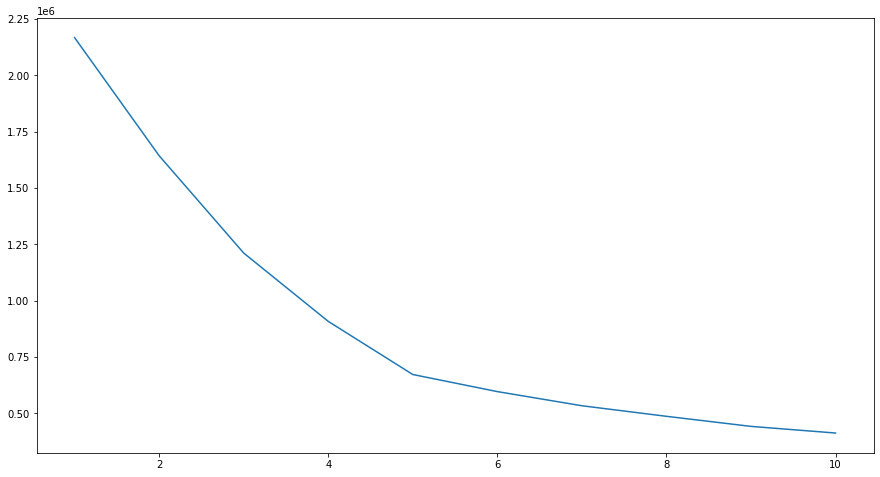

In [237]:
plt.plot(range(1,11), wss);

In [238]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
labels = k_means.labels_

In [239]:
df2["Clus_kmeans"] = labels
df2.head(10)

,Description,Quantity,UnitPrice,Country,Clus_kmeans
0,3918,6.0,2.55,36,4
1,3926,6.0,3.39,36,4
2,913,8.0,2.75,36,3
3,1910,6.0,3.39,36,3
4,2911,6.0,3.39,36,4
5,3158,2.0,7.65,36,0
6,1529,6.0,4.25,36,3
7,1653,6.0,1.85,36,3
8,1650,6.0,1.85,36,3
9,244,23.5,1.69,36,1


In [240]:
df2.head(10).sort_values(["Clus_kmeans"],ascending=False)

,Description,Quantity,UnitPrice,Country,Clus_kmeans
0,3918,6.0,2.55,36,4
1,3926,6.0,3.39,36,4
4,2911,6.0,3.39,36,4
2,913,8.0,2.75,36,3
3,1910,6.0,3.39,36,3
6,1529,6.0,4.25,36,3
7,1653,6.0,1.85,36,3
8,1650,6.0,1.85,36,3
9,244,23.5,1.69,36,1
5,3158,2.0,7.65,36,0


In [241]:
df3=df2.copy()
df3.drop(['Description'],axis=1)

,Quantity,UnitPrice,Country,Clus_kmeans
0,6.0,2.55,36,4
1,6.0,3.39,36,4
2,8.0,2.75,36,3
3,6.0,3.39,36,3
4,6.0,3.39,36,4
...,...,...,...,...
541904,12.0,0.85,13,2
541905,6.0,2.10,13,2
541906,4.0,4.15,13,2
541907,4.0,4.15,13,2


In [242]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  541909 non-null  int16  
 1   Quantity     541909 non-null  float64
 2   UnitPrice    541909 non-null  float64
 3   Country      541909 non-null  int8   
 4   Clus_kmeans  541909 non-null  int32  
dtypes: float64(2), int16(1), int32(1), int8(1)
memory usage: 11.9 MB


In [243]:
df3=df2.iloc[:,1:6]

In [244]:
df3.sort_values(["Clus_kmeans"],ascending=False)

,Quantity,UnitPrice,Country,Clus_kmeans
0,6.0,2.55,36,4
382480,12.0,1.25,36,4
158250,6.0,2.55,36,4
158251,12.0,2.55,36,4
382491,12.0,0.55,36,4
...,...,...,...,...
128798,16.0,8.45,36,0
184794,2.0,7.95,36,0
184795,2.0,7.95,36,0
413588,1.0,5.95,36,0


In [249]:
df4=pd.read_excel('C:/Users/anura/OneDrive/Desktop/DT Consulting/Meergrow/Online Retail.xlsx')
df4.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [251]:
df4["Clus_kmeans"] = labels
df4.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Clus_kmeans
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,3
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,3
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,3
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,1


In [252]:
df4.groupby('Clus_kmeans').count().sort_values('InvoiceNo',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Clus_kmeans,,,,,,,,
3,187465,187465,187465,187465,187465,187465,139249,187465
4,172415,172415,171162,172415,172415,172415,125785,172415
0,87694,87694,87694,87694,87694,87694,51911,87694
1,59450,59450,59249,59450,59450,59450,56113,59450
2,34885,34885,34885,34885,34885,34885,33771,34885





# Platinum:

### From Above we can see that Maximum Quantity Order by Customers (i.e Wholsale_dealer) they come at  Cluster 3. If we name them  as "Platinium" customer who come at Cluster 3.So online_Retailer need to give more attention to such customer who come at "Platinium Category" i.e Cluster 3 . Cluster 4 Also come at "Platinium" Customer range and from the above obseration ,Online Retailer need to take Extra care of  this 3 and 4 Cluster to maintain such ration By Giving Royality.
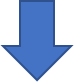

# Gold:

##     Take a look at  Cluster 0 and  name it as "Gold_Customer" . so if we compaire with Order_quantity of Cluster 0 then its half of Cluster 3 and 4. . So online _retailer need to encourage "Gold_Customer" to enter "Platinium" Category by guiding  demand of Product,description of Product with respect to their area.
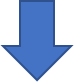

# Silver:

# And cluster 1 and 2  name it as "Silver" Customer  and they are average performer. so, we also have to focus on these category of customers and try to attract them with some advertisement, discount offers.so, they will do more transaction with retail store and become very good customer of Retail store and stay with store for long time. 

# Recomandation:


 ## The Data points are overlaping on Each other and  Most the Data Points are from united_kingdom,need to understand  data avaibility or Sale Problem.Either need to increase sales on other side of country by Advertisment, give Offer to Customers or Promotion of product with respect to Monthly festival  celebrated in country. Like festival in Country play a major role to sell Gift in Mass Quantity so Base on country festival Online_retail need to Guid Customers "Which Product made available in such festival" and Guide Demand of Product with respect to seasonality and base on that price can be set
 
 ## If we look at the Time series  data maximum Quantity Order in between January to march OR at the end of the month.On-other  hand maximum order cancel by customers in same time periods ,if we take count of cancel order =9291  i.e 1.71 % order cancel.So Online_retailer need to reduce this cancelation by giving offer to Customer specialy in start and end of the Months because maximum order cancel in  this months.
 
 ## Based on clusteringCustomers can be segmented toThree category:
 
 
 ### 1)Platinium for Top Customers who come at 3 and 4 Cluster  who having Quantity more than 170000 : say
 
###  2)Gold for Good performance  customers who come at cluster 0 who have quantity more than 87000 and less tahn 170000 : say

### 3)Silver for Average performance customers who come at cluster 1 and 2 who having Quantity less than 87000 :say

 ### Online_retail need to encourage customers to climb Premium Step of Platinu,Gold,Silver by Giving discount / offer .
 
 # 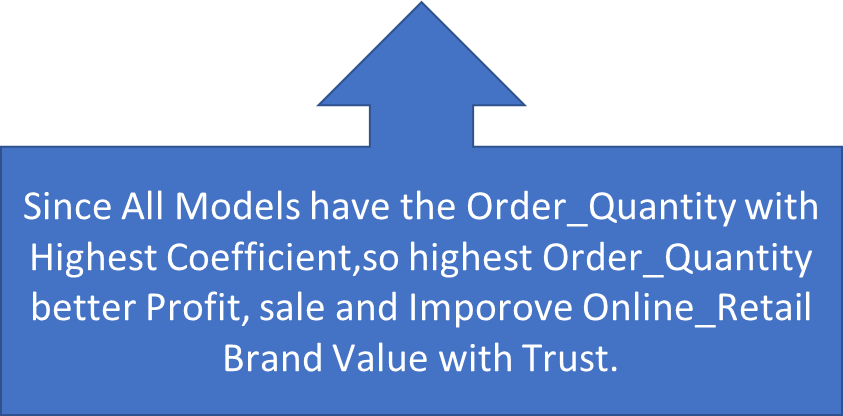